In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('H2HBABBA3076.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,06-05-2019 00:00,2019,1929172144,18-04-2019,20190418,20190418,20190503,USD,RV,1,NaN,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,19-02-2019 00:00,2019,1928725064,03-02-2019,20190202,20190203,20190218,USD,RV,1,NaN,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,21-02-2020 00:00,2020,1930488176,06-02-2020,20200206,20200206,20200221,USD,RV,1,NaN,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,23-01-2019 00:00,2019,1928606586,12-01-2019,20190110,20190112,20190127,USD,RV,1,NaN,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,03-02-2020 00:00,2020,1930420714,20-01-2020,20200121,20200120,20200204,USD,RV,1,NaN,15579.75,20200120,NAA8,1.930421e+09,0


### For generating the target column we have to find the difference between due_in_date and clear date so we will first convert the "out due_in_date" and "clear_date" to get our delay column(Target Column).

In [17]:
# As you can see here all date column are in different dtype so we will first convert all date column to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  object        
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  object        
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  int64         
 9   due_in_date             50000 non-null  int64         
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [8]:
def convtodatetime(col):
    data[col] = data[col].astype(int)
    data[col] = data[col].astype(str)
    data[col] = pd.to_datetime(data[col],format='%Y-%m-%d')

## date Conversion

In [12]:

data['baseline_create_date'] = data['baseline_create_date'].astype(int)
data['baseline_create_date'] = data['baseline_create_date'].astype(str)
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y-%m-%d')

In [15]:
data['document_create_date'] = data['document_create_date'].astype(int)
data['document_create_date'] = data['document_create_date'].astype(str)
data['document_create_date'] = pd.to_datetime(data['document_create_date'],format='%Y-%m-%d')

In [20]:
data['due_in_date'] = data['due_in_date'].astype(int)
data['due_in_date'] = data['due_in_date'].astype(str)
data['due_in_date'] = pd.to_datetime(data['due_in_date'],format='%Y-%m-%d')

In [23]:
data['document_create_date.1'] = data['document_create_date.1'].astype(int)
data['document_create_date.1'] = data['document_create_date.1'].astype(str)
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'],format='%Y-%m-%d')

In [26]:
data['clear_date'] = pd.to_datetime(data['clear_date'])

In [29]:
data['posting_date'] = pd.to_datetime(data['posting_date'])

In [30]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0


In [31]:
#now we can see all  datecolumn are in datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [32]:
# Now we will calculate Delay column by finding difference between clear_date and due_in_date column
data['delay'] = data['clear_date']-data['due_in_date']
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0,33 days
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0,1 days
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0,0 days
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0,-4 days
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0,27 days


In [34]:
#converting delay dtype to float
data['delay'] = data['delay'].dt.days
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [35]:
# Now dividing the main train dateset and test set
Mtrain = data[data.delay.isnull()==False]
Mtest = data[data.delay.isnull()]

In [38]:
# As you can see we have our main train dataset which have delay column values so out of 50000 we are left with 40000 rows
Mtrain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0,33.0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0,1.0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0,0.0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0,-4.0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200794332,COST llc,2019-04-25,2019,1929184617,2019-04-23,2019-04-21,2019-04-23,2019-05-08,USD,RV,1,NaN,33289.64,2019-04-23,NAAX,1.929185e+09,0,-13.0
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-12,2019-02-27,USD,RV,1,NaN,7821.59,2019-02-12,NAA8,1.928787e+09,0,0.0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-06-22,2019-07-07,USD,RV,1,NaN,38750.48,2019-06-22,NAH4,1.929531e+09,0,62.0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-13,2019-06-28,USD,RV,1,NaN,22407.33,2019-06-13,NAA8,1.929486e+09,0,-172.0


# Preprocessing

In [41]:
#Checking null values in each column
# Null imputation
Mtrain.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay                         0
dtype: int64

In [42]:
# let's check out null rows that why it is null
Mtrain[Mtrain.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
865,CA02,140104409,LOB co,2019-05-31,2019,9500000058,2019-03-29,2019-03-29,2019-03-14,2019-03-24,CAD,X2,1,NaN,13595.04,2019-03-14,CA10,NaN,0,68.0
19145,CA02,140104225,SAVE-ON- in,2019-02-05,2019,9500000084,2019-03-29,2019-03-29,2019-02-20,2019-03-02,CAD,X2,1,NaN,3620.16,2019-02-20,CA10,NaN,0,-25.0
28895,CA02,140104409,LOB in,2019-12-27,2019,9500000200,2019-04-30,2019-04-30,2019-04-08,2019-04-18,CAD,X2,1,NaN,454.44,2019-04-08,CA10,NaN,0,253.0
49188,CA02,140104409,LOB co,2019-12-27,2019,9500000073,2019-03-29,2019-03-29,2019-02-28,2019-03-10,CAD,X2,1,NaN,173.44,2019-02-28,CA10,NaN,0,292.0


#### Now checking if invoice_id null values id dependent of any column of not

In [43]:
#we can see it is not related to 'invoice_currency' column as not all CAD values has invoice_id as null
Mtrain[Mtrain.invoice_currency=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


In [44]:
#we can see it is not related to 'business_code' column as not all CA02 values has invoice_id as null
Mtrain[Mtrain.business_code=='CA02']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


In [45]:
#we can see it is not related to 'cust_payment_terms' column as not all CA10 values has invoice_id as null
Mtrain[Mtrain.cust_payment_terms=='CA10']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


### Hence we can conclude that the null values in invoice_id column are missing at Random so we can drop that 4 rows because it is just 0.01% of the total data so it will not make any change in the model prediction.

### Dropping those 4 null rows and redefining the Mtrain

In [46]:
Mtrain = Mtrain[Mtrain.invoice_id.isnull()==False]
Mtrain.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             39996
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                         0
dtype: int64

### We can observe that in area_business column there are 39996 null values which is equal to the total rows we have so we will drop that column as it has only one value and will not help us in predicting


In [48]:
#constant column removal
Mtrain.drop(['area_business'],axis=1,inplace=True)

In [50]:
# we can see there are no null values in out Mtrain dataset
Mtrain.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
delay                     0
dtype: int64

In [52]:
# We can see the correlation between columns by .corr() function but it will only show the correlaiton between int or float type column
Mtrain.corr()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,delay
buisness_year,1.000000,-0.008778,NaN,-0.001390,-0.008778,NaN,0.201318
doc_id,-0.008778,1.000000,NaN,0.177330,1.000000,NaN,0.024503
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.001390,0.177330,NaN,1.000000,0.177330,NaN,0.009139
invoice_id,-0.008778,1.000000,NaN,0.177330,1.000000,NaN,0.024503
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delay,0.201318,0.024503,NaN,0.009139,0.024503,NaN,1.000000


In [53]:
Mtrain.nunique()

business_code                 6
cust_number                1004
name_customer              3872
clear_date                  400
buisness_year                 2
doc_id                    39139
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 496
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35621
baseline_create_date        430
cust_payment_terms           71
invoice_id                39139
isOpen                        1
delay                       590
dtype: int64

### As we can see above that the columns document type,posting_id and isOpen column has only one unique values hence,we can say it is a constant column

In [58]:
# dropping the constant column
Mtrain.drop(['posting_id','isOpen','document type'],axis=1,inplace=True)

In [59]:
Mtrain.nunique()

business_code                 6
cust_number                1004
name_customer              3872
clear_date                  400
buisness_year                 2
doc_id                    39139
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 496
invoice_currency              2
total_open_amount         35621
baseline_create_date        430
cust_payment_terms           71
invoice_id                39139
delay                       590
dtype: int64

### Now we don't have any constant column.rest all has categorical or continuous values

In [62]:
Mtrain.business_code.value_counts()

U001    36134
CA02     3172
U013      528
U002      149
U005       12
U007        1
Name: business_code, dtype: int64

In [81]:
# Merging the least occuring values with respect to the other data so 'U005' and 'U007' becomes 'other codes'
Mtrain['business_code'] = np.where(Mtrain['business_code'].isin(['U005','U007']),'Other codes',Mtrain['business_code'])

In [82]:
#U005 and U007 is converted to other codes,this will be helpful to the machine model to predict
Mtrain.business_code.value_counts()

U001           36134
CA02            3172
U013             528
U002             149
Other codes       13
Name: business_code, dtype: int64

In [85]:
#checking the range of clear dates
Mtrain['clear_date'].min(),Mtrain['clear_date'].max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2020-12-05 00:00:00'))

In [86]:
# Sorting the Mtrain with respect to clear_date column
Mtrain.sort_values(by=['clear_date'],inplace=True)
Mtrain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
46404,U001,200704045,RA llc,2019-01-02,2019,1928625003,2019-01-16,2019-01-15,2019-01-16,2019-01-31,USD,60562.39,2019-01-16,NAA8,1.928625e+09,-29.0
3823,U001,200886415,COSTCO systems,2019-01-02,2019,1928608925,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5276.40,2019-01-16,NAA8,1.928609e+09,-29.0
26187,U001,200762301,C&S WH corporation,2019-01-02,2019,1928637124,2019-01-18,2019-01-17,2019-01-18,2019-02-02,USD,17517.96,2019-01-18,NAC6,1.928637e+09,-31.0
2440,U001,200776463,KROGE associates,2019-01-02,2019,1928638844,2019-01-17,2019-01-17,2019-01-17,2019-02-01,USD,2646.76,2019-01-17,NAA8,1.928639e+09,-30.0
5380,U001,100035877,DUNKIN systems,2019-01-02,2019,1928613000,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5973.28,2019-01-16,NAA8,1.928613e+09,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38318,U002,200501669,WAL MA corporation,2020-12-03,2020,1990570708,2020-01-02,2020-01-30,2020-02-01,2020-03-07,USD,16156.50,2020-02-01,NAG2,1.990571e+09,271.0
21200,U001,200568183,E G AY in,2020-12-03,2020,1930570468,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,20090.59,2020-02-26,NAA8,1.930570e+09,266.0
29915,U001,200793088,DEMOU llc,2020-12-03,2020,1930550838,2020-02-26,2020-02-20,2020-02-26,2020-03-12,USD,40663.12,2020-02-26,NAA8,1.930551e+09,266.0
40642,CA02,140105686,SYSC,2020-12-03,2020,2960613579,2020-11-02,2020-02-11,2020-02-11,2020-03-01,CAD,50816.13,2020-02-20,CA10,2.960614e+09,277.0


# splitting data into train,validation and test

In [173]:
#splitting
X = Mtrain.drop(['delay'],axis=1)
y = Mtrain['delay']
X_train,X_Valtest,y_train,y_Valtest = train_test_split(X,y,test_size=0.3,random_state=16,shuffle=False)

In [174]:
#checking the shape of our splitting
X_train.shape,X_Valtest.shape,y_train.shape,y_Valtest.shape

((27997, 15), (11999, 15), (27997,), (11999,))

In [175]:
X_val,X_test,y_val,y_test = train_test_split(X_Valtest,y_Valtest,test_size=0.3,random_state=16,shuffle=False)

In [176]:
#checking the shape of our splitting
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((8399, 15), (3600, 15), (8399,), (3600,))

# EDA

### Now we will doing all the steps required on X_train dataset

In [177]:
#importing Seaborn library for graph purpose
import seaborn as sns

<AxesSubplot:xlabel='delay', ylabel='Density'>

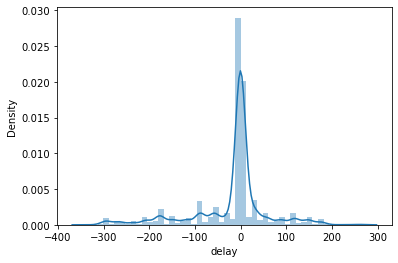

In [178]:
sns.distplot(y_train)

In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27997 non-null  object        
 1   cust_number             27997 non-null  object        
 2   name_customer           27997 non-null  object        
 3   clear_date              27997 non-null  datetime64[ns]
 4   buisness_year           27997 non-null  int64         
 5   doc_id                  27997 non-null  int64         
 6   posting_date            27997 non-null  datetime64[ns]
 7   document_create_date    27997 non-null  datetime64[ns]
 8   document_create_date.1  27997 non-null  datetime64[ns]
 9   due_in_date             27997 non-null  datetime64[ns]
 10  invoice_currency        27997 non-null  object        
 11  total_open_amount       27997 non-null  float64       
 12  baseline_create_date    27997 non-null  dat

<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

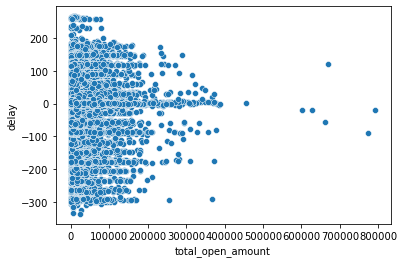

In [180]:
#here we can plot some scatter plot to see if any column is related to delay column or not
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='total_open_amount',y='delay')

### It says that it doesn't matter that if total_open_amount is high or low ,we are not getting linear relation

<AxesSubplot:xlabel='doc_id', ylabel='delay'>

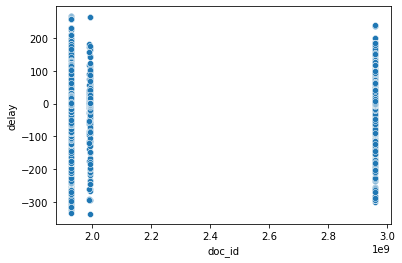

In [181]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='doc_id',y='delay')

#### NO relation seen between doc_id and delay

<AxesSubplot:xlabel='buisness_year', ylabel='delay'>

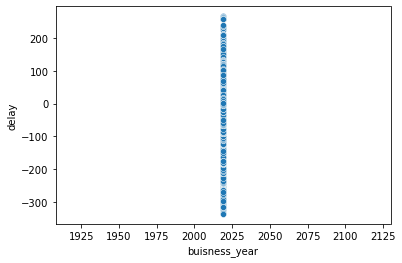

In [182]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='buisness_year',y='delay')

#### No relation between business_year and dely column also

<AxesSubplot:>

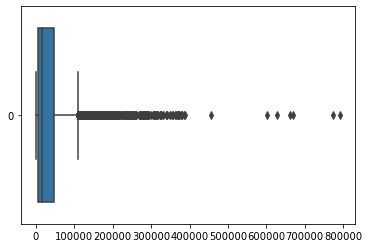

In [183]:
sns.boxplot(data=X_train.total_open_amount,orient='h')

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

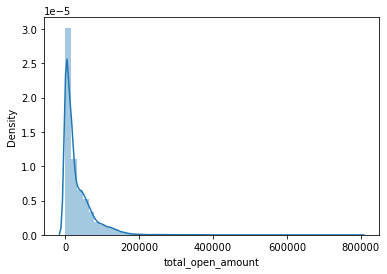

In [184]:
sns.distplot(X_train['total_open_amount'])

<AxesSubplot:xlabel='doc_id', ylabel='total_open_amount'>

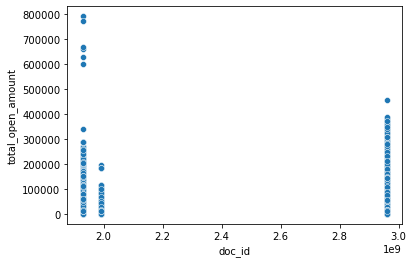

In [185]:
sns.scatterplot(data=X_train,x='doc_id',y='total_open_amount')#not related

<AxesSubplot:xlabel='doc_id', ylabel='invoice_id'>

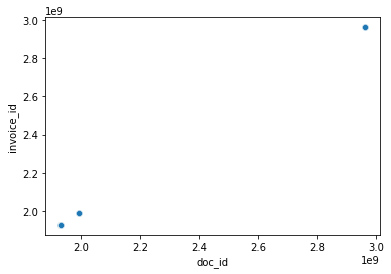

In [186]:
sns.scatterplot(data=X_train,x='doc_id',y='invoice_id')#not related

In [187]:
X_train[['doc_id','invoice_id']].corr() 

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


#### As we can see the doc_id and invoice_id are very correlated from corr() funtion and the scatter plot. So we can drop any one column

In [188]:
# Deleting invoice_id column from all X_train,X_val,X_test means from train,validation and local test dataset
X_train.drop(['invoice_id'],axis=1,inplace=True)
X_val.drop(['invoice_id'],axis=1,inplace=True)
X_test.drop(['invoice_id'],axis=1,inplace=True)
X_train.shape,X_val.shape,X_test.shape

((27997, 14), (8399, 14), (3600, 14))

In [237]:
X_train

,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,businee_enc,cust_num_encd,name_cust_encd,invoice_currency_encd,cust_pay_terms_encd
46404,2019-01-02,2019,1928625003,2019-01-16,2019-01-15,2019-01-16,2019-01-31,60562.39,2019-01-16,2,600,2417,1,19
3823,2019-01-02,2019,1928608925,2019-01-16,2019-01-11,2019-01-16,2019-01-31,5276.40,2019-01-16,2,849,662,1,19
26187,2019-01-02,2019,1928637124,2019-01-18,2019-01-17,2019-01-18,2019-02-02,17517.96,2019-01-18,2,726,444,1,24
2440,2019-01-02,2019,1928638844,2019-01-17,2019-01-17,2019-01-17,2019-02-01,2646.76,2019-01-17,2,756,1680,1,19
5380,2019-01-02,2019,1928613000,2019-01-16,2019-01-11,2019-01-16,2019-01-31,5973.28,2019-01-16,2,137,878,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23066,2019-10-28,2019,1991831763,2019-10-09,2019-09-10,2019-09-10,2019-10-25,13636.50,2019-09-10,4,899,1337,1,53
32635,2019-10-28,2019,1930007993,2019-10-14,2019-10-13,2019-10-14,2019-10-29,81653.80,2019-10-14,2,809,645,1,21
28941,2019-10-28,2019,1930010711,2019-10-17,2019-10-14,2019-10-17,2019-11-01,17799.00,2019-10-17,2,158,98,1,19
25150,2019-10-28,2019,1930009152,2019-10-13,2019-10-14,2019-10-13,2019-10-28,58774.77,2019-10-13,2,651,1700,1,19


# Feature Engineering

### Now for Model prediction we need every feature to be in integer or float dtype So we will convert all dtype to int or float.

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27997 non-null  object        
 1   cust_number             27997 non-null  object        
 2   name_customer           27997 non-null  object        
 3   clear_date              27997 non-null  datetime64[ns]
 4   buisness_year           27997 non-null  int64         
 5   doc_id                  27997 non-null  int64         
 6   posting_date            27997 non-null  datetime64[ns]
 7   document_create_date    27997 non-null  datetime64[ns]
 8   document_create_date.1  27997 non-null  datetime64[ns]
 9   due_in_date             27997 non-null  datetime64[ns]
 10  invoice_currency        27997 non-null  object        
 11  total_open_amount       27997 non-null  float64       
 12  baseline_create_date    27997 non-null  dat

#### Only 3 column out of 14 are in int or float dtype

In [191]:
# let's begin by encodding the object dtype columns into int or float

X_train['business_code'].unique()# -->Gives us 5 unique values

array(['U001', 'CA02', 'U013', 'U002', 'Other codes'], dtype=object)

In [192]:
# Encodding by labelEncoder method
from sklearn.preprocessing import LabelEncoder

businesscode_enc = LabelEncoder()
X_train['businee_enc'] = businesscode_enc.fit_transform(X_train['business_code'])


In [193]:
X_train[['business_code','businee_enc']]

,business_code,businee_enc
46404,U001,2
3823,U001,2
26187,U001,2
2440,U001,2
5380,U001,2
...,...,...
23066,U013,4
32635,U001,2
28941,U001,2
25150,U001,2


In [194]:
X_train['businee_enc'].unique()

array([2, 0, 4, 3, 1])

In [195]:
list(businesscode_enc.inverse_transform([2, 0, 4, 3, 1]))#corresponding encoded value

['U001', 'CA02', 'U013', 'U002', 'Other codes']

#### we can see that 2-->U001, 0-->CA02, 4-->U013, 3-->U002 and 1-->Other codes

In [196]:
# changing validation set and local test set also
X_val['businee_enc'] = businesscode_enc.fit_transform(X_val['business_code'])
X_test['businee_enc'] = businesscode_enc.fit_transform(X_test['business_code'])
X_train.shape,X_val.shape,X_test.shape

((27997, 15), (8399, 15), (3600, 15))

In [197]:
## Now we can drop the business_code column which contains object type values
X_train.drop(['business_code'],axis=1,inplace=True)
X_val.drop(['business_code'],axis=1,inplace=True)
X_test.drop(['business_code'],axis=1,inplace=True)

### Creating a drop function for dropping columns so we don't have to write these three lines again nad again.

In [199]:
def dropcol(col,t=X_train,v=X_val,tes = X_test):
    t.drop([col],axis=1,inplace=True)
    v.drop([col],axis=1,inplace=True)
    tes.drop([col],axis=1,inplace=True)
    
    return t, v, tes

In [202]:
# Encodding by labelEncoder method
# Encodding the cust_number column

cust_num_encd = LabelEncoder()
X_train['cust_num_encd'] = cust_num_encd.fit_transform(X_train['cust_number'])
X_val['cust_num_encd'] = cust_num_encd.fit_transform(X_val['cust_number'])
X_test['cust_num_encd'] = cust_num_encd.fit_transform(X_test['cust_number'])

In [203]:
X_train, X_val, X_test = dropcol('cust_number')

In [206]:
# Encodding by labelEncoder method
# Encodding the  name_customer column

name_cust_encd = LabelEncoder()
X_train['name_cust_encd'] = name_cust_encd.fit_transform(X_train['name_customer'])
X_val['name_cust_encd'] = name_cust_encd.fit_transform(X_val['name_customer'])
X_test['name_cust_encd'] = name_cust_encd.fit_transform(X_test['name_customer'])

In [208]:
X_train, X_val, X_test = dropcol('name_customer')

In [213]:
# Encodding by labelEncoder method
# Encodding the  invoice_currency column

invoice_currency_encd = LabelEncoder()
X_train['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_test['invoice_currency'])

In [214]:
X_train, X_val, X_test = dropcol('invoice_currency')

In [219]:
# Encodding by labelEncoder method
# Encodding the cust_payment_terms column

cust_pay_terms_encd = LabelEncoder()
X_train['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_train['cust_payment_terms'])
X_val['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_val['cust_payment_terms'])
X_test['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_test['cust_payment_terms'])

In [220]:
X_train, X_val, X_test = dropcol('cust_payment_terms')

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              27997 non-null  datetime64[ns]
 1   buisness_year           27997 non-null  int64         
 2   doc_id                  27997 non-null  int64         
 3   posting_date            27997 non-null  datetime64[ns]
 4   document_create_date    27997 non-null  datetime64[ns]
 5   document_create_date.1  27997 non-null  datetime64[ns]
 6   due_in_date             27997 non-null  datetime64[ns]
 7   total_open_amount       27997 non-null  float64       
 8   baseline_create_date    27997 non-null  datetime64[ns]
 9   businee_enc             27997 non-null  int32         
 10  cust_num_encd           27997 non-null  int32         
 11  name_cust_encd          27997 non-null  int32         
 12  invoice_currency_encd   27997 non-null  int

### Now we have converted all object dtype value into int dtype value so we will start date manipulation process.

### Splitting clear_date column into day,weekday and month column

In [238]:
# Date Manipulation in train into day,day of the week and month
X_train['clear_date_day'] = X_train['clear_date'].dt.day
X_train['clear_date_month'] = X_train['clear_date'].dt.month
X_train['clear_date_weekday']  = X_train['clear_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['clear_date_day'] = X_val['clear_date'].dt.day
X_val['clear_date_month'] = X_val['clear_date'].dt.month
X_val['clear_date_weekday']  = X_val['clear_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['clear_date_day'] = X_test['clear_date'].dt.day
X_test['clear_date_month'] = X_test['clear_date'].dt.month
X_test['clear_date_weekday']  = X_test['clear_date'].dt.weekday

In [263]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   buisness_year                   27997 non-null  int64         
 1   doc_id                          27997 non-null  int64         
 2   total_open_amount               27997 non-null  float64       
 3   baseline_create_date            27997 non-null  datetime64[ns]
 4   businee_enc                     27997 non-null  int32         
 5   cust_num_encd                   27997 non-null  int32         
 6   name_cust_encd                  27997 non-null  int32         
 7   invoice_currency_encd           27997 non-null  int32         
 8   cust_pay_terms_encd             27997 non-null  int32         
 9   clear_date_day                  27997 non-null  int64         
 10  clear_date_month                27997 non-null  int64         
 11 

In [242]:
X_train[['clear_date','clear_date_day','clear_date_month','clear_date_weekday']]

,clear_date,clear_date_day,clear_date_month,clear_date_weekday
46404,2019-01-02,2,1,2
3823,2019-01-02,2,1,2
26187,2019-01-02,2,1,2
2440,2019-01-02,2,1,2
5380,2019-01-02,2,1,2
...,...,...,...,...
23066,2019-10-28,28,10,0
32635,2019-10-28,28,10,0
28941,2019-10-28,28,10,0
25150,2019-10-28,28,10,0


#### Now we can drop the dateyime column clear_date from all train,Val and test set

In [243]:
X_train, X_val, X_test = dropcol('clear_date')

### Splitting posting_date column into day,weekday and month column

In [245]:
# Date Manipulation in train into day,day of the week and month
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_weekday']  = X_train['posting_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_weekday']  = X_val['posting_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_test['posting_date_weekday']  = X_test['posting_date'].dt.weekday

In [247]:
#Dropping posting_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('posting_date')

### Splitting document_create_date into day,month and weekday

In [251]:
# Date Manipulation in train into day,day of the week and month
X_train['document_create_date_day'] = X_train['document_create_date'].dt.day
X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_train['document_create_date_weekday']  = X_train['document_create_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['document_create_date_day'] = X_val['document_create_date'].dt.day
X_val['document_create_date_month'] = X_val['document_create_date'].dt.month
X_val['document_create_date_weekday']  = X_val['document_create_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['document_create_date_day'] = X_test['document_create_date'].dt.day
X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_test['document_create_date_weekday']  = X_test['document_create_date'].dt.weekday

In [252]:
#Dropping document_create_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('document_create_date')

### Splitting document_create_date.1 into day,month and weekday

In [257]:
# Date Manipulation in train into day,day of the week and month
X_train['document_create_date.1_day'] = X_train['document_create_date.1'].dt.day
X_train['document_create_date.1_month'] = X_train['document_create_date.1'].dt.month
X_train['document_create_date.1_weekday']  = X_train['document_create_date.1'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['document_create_date.1_day'] = X_val['document_create_date.1'].dt.day
X_val['document_create_date.1_month'] = X_val['document_create_date.1'].dt.month
X_val['document_create_date.1_weekday']  = X_val['document_create_date.1'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['document_create_date.1_day'] = X_test['document_create_date.1'].dt.day
X_test['document_create_date.1_month'] = X_test['document_create_date.1'].dt.month
X_test['document_create_date.1_weekday']  = X_test['document_create_date.1'].dt.weekday

In [258]:
#Dropping document_create_date.1 column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('document_create_date.1')

### Splitting due_in_date into day,month and weekday

In [260]:
# Date Manipulation in train into day,day of the week and month
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_train['due_in_date_weekday']  = X_train['due_in_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['due_in_date_day'] = X_val['due_in_date'].dt.day
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month
X_val['due_in_date_weekday']  = X_val['due_in_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['due_in_date_day'] = X_test['due_in_date'].dt.day
X_test['due_in_date_month'] = X_test['due_in_date'].dt.month
X_test['due_in_date_weekday']  = X_test['due_in_date'].dt.weekday

In [261]:
#Dropping dur_in_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('due_in_date')

### Splitting baseline_create_date into day,month and weekday

In [264]:
# Date Manipulation in train into day,day of the week and month
X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_date_weekday']  = X_train['baseline_create_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['baseline_create_date_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_date_weekday']  = X_val['baseline_create_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['baseline_create_date_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_date_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_date_weekday']  = X_test['baseline_create_date'].dt.weekday

In [265]:
#Dropping baseline_create_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('baseline_create_date')

In [266]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   buisness_year                   27997 non-null  int64  
 1   doc_id                          27997 non-null  int64  
 2   total_open_amount               27997 non-null  float64
 3   businee_enc                     27997 non-null  int32  
 4   cust_num_encd                   27997 non-null  int32  
 5   name_cust_encd                  27997 non-null  int32  
 6   invoice_currency_encd           27997 non-null  int32  
 7   cust_pay_terms_encd             27997 non-null  int32  
 8   clear_date_day                  27997 non-null  int64  
 9   clear_date_month                27997 non-null  int64  
 10  clear_date_weekday              27997 non-null  int64  
 11  posting_date_day                27997 non-null  int64  
 12  posting_date_month           

## we can see that every column in out dataset are in Dtype int or float type

# Feature Selection

## Univariate Selection

In [401]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [403]:
#applying SelectKBest class to extract top 10 best feature with respect to target column
bestfeature = SelectKBest(score_func=chi2,k=10)
ft = bestfeature.fit(X_train,y_train)

In [405]:
scores = pd.DataFrame(ft.scores_)
colums = pd.DataFrame(X_train.columns)

In [410]:
featurescores = pd.concat([colums,scores],axis=1)
featurescores.columns = ['feature','Score']
featurescores

,feature,Score
0,doc_id,1.765340e+11
1,total_open_amount,7.173419e+07
2,businee_enc,6.912338e+02
3,cust_num_encd,1.672745e+05
4,name_cust_encd,4.070001e+06
5,invoice_currency_encd,3.598225e+02
6,cust_pay_terms_encd,2.786357e+04
7,clear_date_day,8.052010e+04
8,clear_date_month,9.746903e+03
9,clear_date_weekday,1.191241e+04


In [415]:
print(featurescores.nlargest(5,'Score'))

             feature         Score
0             doc_id  1.765340e+11
1  total_open_amount  7.173419e+07
4     name_cust_encd  4.070001e+06
3      cust_num_encd  1.672745e+05
7     clear_date_day  8.052010e+04


## Feature importance method

In [434]:
from sklearn.ensemble import ExtraTreesRegressor
mod = ExtraTreesRegressor()
mod.fit(X_train,y_train)

ExtraTreesRegressor()

In [435]:
mod.feature_importances_

array([1.86861386e-04, 7.00211920e-05, 8.16301882e-05, 3.69428977e-04,
       2.39108034e-04, 5.41090686e-05, 1.40850772e-03, 8.60686809e-02,
       4.50048163e-01, 8.49427796e-03, 1.56113750e-03, 3.57241686e-03,
       6.71432619e-05, 2.93080523e-04, 8.36140502e-02, 5.30001683e-05,
       7.20286312e-03, 2.51154557e-01, 1.03373805e-04, 1.19068767e-03,
       1.04102622e-01, 6.42792275e-05])

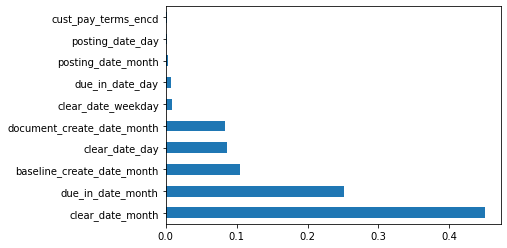

In [439]:
feat_imp = pd.Series(mod.feature_importances_,index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [285]:
corrmat = X_train.merge(y_train,on=X_train.index).corr()

In [286]:
corrmat

,key_0,doc_id,total_open_amount,businee_enc,cust_num_encd,name_cust_encd,invoice_currency_encd,cust_pay_terms_encd,clear_date_day,clear_date_month,...,document_create_date_day,document_create_date_month,document_create_date_weekday,due_in_date_day,due_in_date_month,due_in_date_weekday,baseline_create_date_day,baseline_create_date_month,baseline_create_date_weekday,delay
key_0,1.000000,-0.006254,-0.001409,0.008207,0.002998,-0.004468,0.006451,0.005238,0.001603,-0.005160,...,0.010205,-0.003839,-0.003716,-0.001449,-0.001382,0.002109,0.007670,-0.004128,-0.001088,-0.003678
doc_id,-0.006254,1.000000,0.179572,-0.911525,-0.513532,-0.022965,-0.999608,-0.520724,-0.003900,0.021072,...,0.010937,-0.002975,-0.004982,0.003940,-0.010289,0.043459,0.015287,0.006173,-0.003224,0.033450
total_open_amount,-0.001409,0.179572,1.000000,-0.175115,-0.094044,-0.019281,-0.180173,-0.204019,-0.009814,0.029497,...,0.012491,0.022335,0.012829,-0.018650,0.020661,0.001833,0.026917,0.023958,-0.019924,0.008482
businee_enc,0.008207,-0.911525,-0.175115,1.000000,0.418248,0.003903,0.922387,0.586663,0.021625,-0.011286,...,-0.000971,-0.004655,-0.004838,-0.002831,0.012646,-0.046048,-0.009507,-0.013840,0.009186,-0.024607
cust_num_encd,0.002998,-0.513532,-0.094044,0.418248,1.000000,0.218005,0.510272,0.379426,0.027132,-0.017746,...,0.003372,0.001212,0.040423,-0.011997,-0.001184,-0.017216,0.028430,-0.003993,0.035898,-0.012117
name_cust_encd,-0.004468,-0.022965,-0.019281,0.003903,0.218005,1.000000,0.021842,0.100724,-0.000027,0.016103,...,0.006885,0.004802,0.076761,-0.004731,-0.003040,0.016091,0.053722,0.006291,0.085249,0.020168
invoice_currency_encd,0.006451,-0.999608,-0.180173,0.922387,0.510272,0.021842,1.000000,0.527553,0.005072,-0.019683,...,-0.010232,0.003789,0.004332,-0.004064,0.011926,-0.043860,-0.014894,-0.005371,0.003724,-0.033694
cust_pay_terms_encd,0.005238,-0.520724,-0.204019,0.586663,0.379426,0.100724,0.527553,1.000000,0.021548,-0.037246,...,0.014535,-0.008504,0.019171,0.000397,0.015659,-0.048937,-0.006606,-0.013833,0.089729,-0.053345
clear_date_day,0.001603,-0.003900,-0.009814,0.021625,0.027132,-0.000027,0.005072,0.021548,1.000000,0.030745,...,-0.373062,0.057514,-0.009608,0.553847,-0.022261,0.010959,-0.371325,0.056935,-0.009635,0.099338
clear_date_month,-0.005160,0.021072,0.029497,-0.011286,-0.017746,0.016103,-0.019683,-0.037246,0.030745,1.000000,...,0.088001,0.530849,0.018196,-0.003110,0.555122,0.000719,0.092857,0.546762,-0.005000,0.439818


### As you can notice column buisness_year has no colrrelation between any any column so we can drop that column.

In [269]:
X_traindropcol('buisness_year')

(           doc_id  total_open_amount  businee_enc  cust_num_encd  \
 46404  1928625003           60562.39            2            600   
 3823   1928608925            5276.40            2            849   
 26187  1928637124           17517.96            2            726   
 2440   1928638844            2646.76            2            756   
 5380   1928613000            5973.28            2            137   
 ...           ...                ...          ...            ...   
 23066  1991831763           13636.50            4            899   
 32635  1930007993           81653.80            2            809   
 28941  1930010711           17799.00            2            158   
 25150  1930009152           58774.77            2            651   
 4457   1929995654           13417.51            2            531   
 
        name_cust_encd  invoice_currency_encd  cust_pay_terms_encd  \
 46404            2417                      1                   19   
 3823              662        

### For better understanding of Corelation we can plot heat map of correlation matrix

<AxesSubplot:>

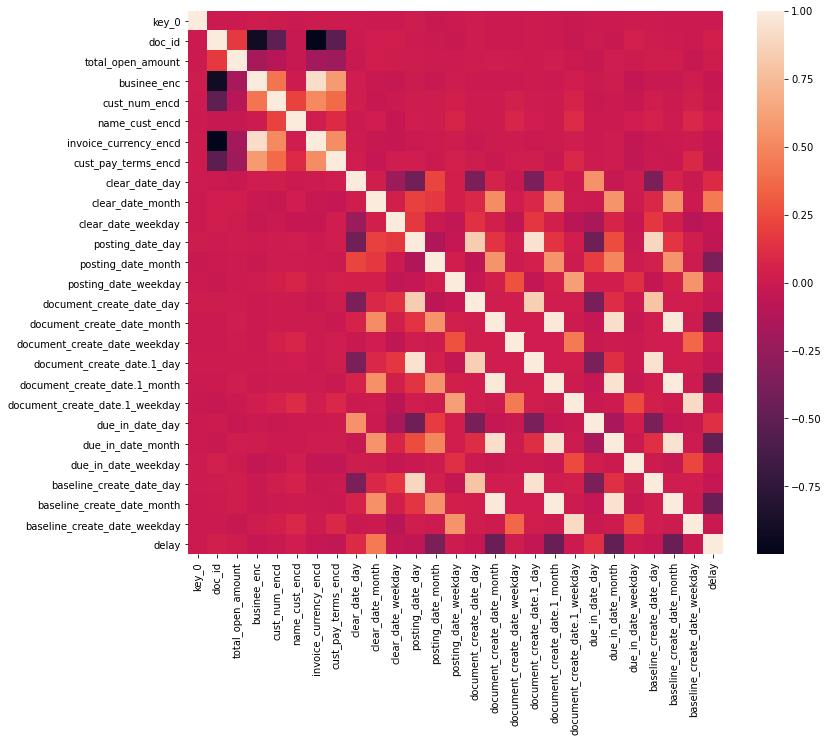

In [278]:

plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,)

In [279]:
# checking the correlation in numeric % values
X_train[['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday','baseline_create_date_day','baseline_create_date_month','baseline_create_date_weekday']].corr()

,document_create_date.1_day,document_create_date.1_month,document_create_date.1_weekday,baseline_create_date_day,baseline_create_date_month,baseline_create_date_weekday
document_create_date.1_day,1.000000,0.019661,0.026663,0.946737,0.023099,0.028083
document_create_date.1_month,0.019661,1.000000,0.003907,0.022745,0.998308,0.002256
document_create_date.1_weekday,0.026663,0.003907,1.000000,0.031503,0.003828,0.908784
baseline_create_date_day,0.946737,0.022745,0.031503,1.000000,0.019594,0.022043
baseline_create_date_month,0.023099,0.998308,0.003828,0.019594,1.000000,0.002247
baseline_create_date_weekday,0.028083,0.002256,0.908784,0.022043,0.002247,1.000000


#### We can see the correlation between document_create_date and baseline_create_date,days are 94% similar and month is 99.8% similar and the weekday is 90% related

In [281]:
# So we can drop any one of the column 
# dropping document_create_date.1_day,document_create_date.1_month, and documnent_create_date.1_weekday
X_train.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)
X_train

,doc_id,total_open_amount,businee_enc,cust_num_encd,name_cust_encd,invoice_currency_encd,cust_pay_terms_encd,clear_date_day,clear_date_month,clear_date_weekday,...,posting_date_weekday,document_create_date_day,document_create_date_month,document_create_date_weekday,due_in_date_day,due_in_date_month,due_in_date_weekday,baseline_create_date_day,baseline_create_date_month,baseline_create_date_weekday
46404,1928625003,60562.39,2,600,2417,1,19,2,1,2,...,2,15,1,1,31,1,3,16,1,2
3823,1928608925,5276.40,2,849,662,1,19,2,1,2,...,2,11,1,4,31,1,3,16,1,2
26187,1928637124,17517.96,2,726,444,1,24,2,1,2,...,4,17,1,3,2,2,5,18,1,4
2440,1928638844,2646.76,2,756,1680,1,19,2,1,2,...,3,17,1,3,1,2,4,17,1,3
5380,1928613000,5973.28,2,137,878,1,19,2,1,2,...,2,11,1,4,31,1,3,16,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23066,1991831763,13636.50,4,899,1337,1,53,28,10,0,...,2,10,9,1,25,10,4,10,9,1
32635,1930007993,81653.80,2,809,645,1,21,28,10,0,...,0,13,10,6,29,10,1,14,10,0
28941,1930010711,17799.00,2,158,98,1,19,28,10,0,...,3,14,10,0,1,11,4,17,10,3
25150,1930009152,58774.77,2,651,1700,1,19,28,10,0,...,6,14,10,0,28,10,0,13,10,6


In [291]:
# Dropping from validation and test set also 
X_val.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)
X_test.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)

<AxesSubplot:>

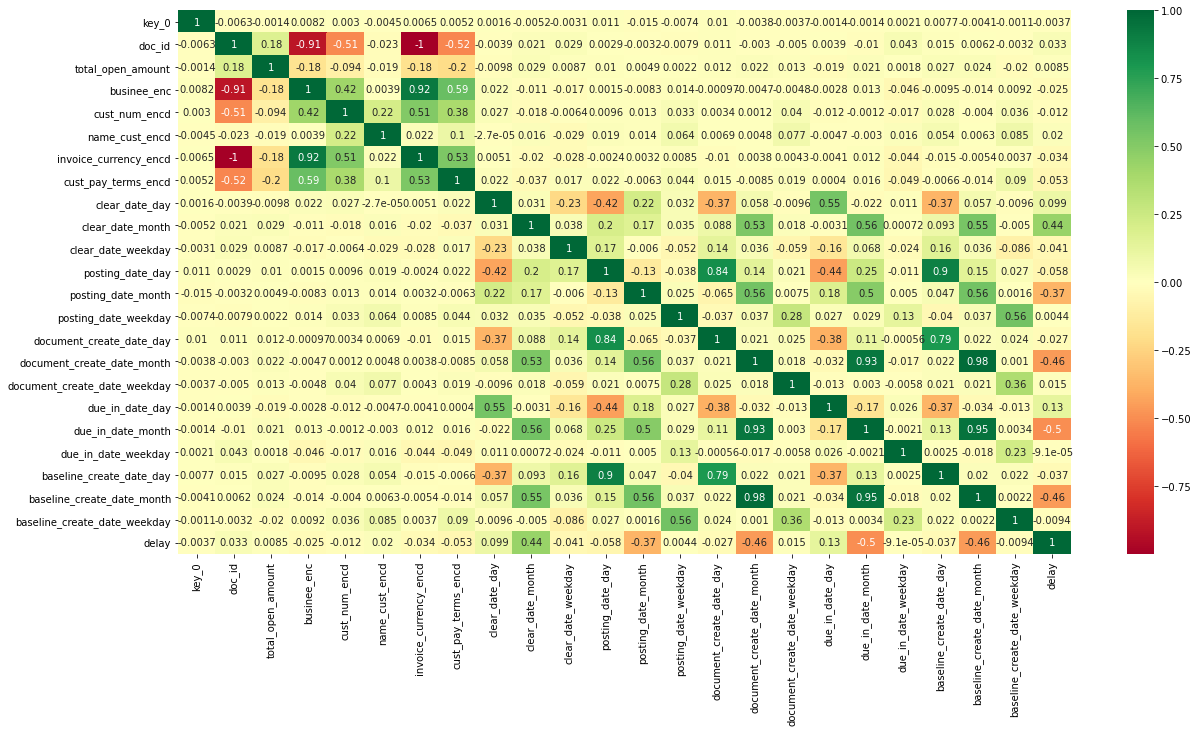

In [477]:
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

# Machine Learning Model

# linearRegressor Model

In [289]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

In [294]:
 predicted = base_model.predict(X_val)

In [296]:
pd.DataFrame(zip(y_val,predicted),columns=['Actual','Predicted'])

,Actual,Predicted
0,2.0,2.397082
1,-4.0,-4.544715
2,2.0,1.267833
3,2.0,1.492891
4,2.0,1.400237
...,...,...
8394,-22.0,-23.579434
8395,3.0,4.357146
8396,0.0,-0.315450
8397,0.0,0.125356


### we can see side to side comparison of then actual value we have and the ones the model predicted

In [297]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,predicted,squared=False)

52.056284756179394

# Decision Tree Model

In [372]:
# trying another model
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=20)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [373]:
predictedTree = tree_model.predict(X_val)
mean_squared_error(y_val,predictedTree,squared=False)

46.92339179728777

In [664]:
tree_model2 = DecisionTreeRegressor(max_depth=11)
tree_model2.fit(X_train[['due_in_date_day','clear_date_day','clear_date_month']],y_train)

DecisionTreeRegressor(max_depth=11)

In [665]:
predictedTree2 = tree_model2.predict(X_val[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_val,predictedTree2,squared=False)

37.01712126374413

In [666]:
predictedTree2test = tree_model2.predict(X_test[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_test,predictedTree2test,squared=False)

37.91037593760392

### trying features according to Univariate selection

In [416]:
print(featurescores.nlargest(5,'Score'))

             feature         Score
0             doc_id  1.765340e+11
1  total_open_amount  7.173419e+07
4     name_cust_encd  4.070001e+06
3      cust_num_encd  1.672745e+05
7     clear_date_day  8.052010e+04


In [620]:
tree_model2uni = DecisionTreeRegressor(max_depth=4)
tree_model2uni.fit(X_train[['due_in_date_day','cust_num_encd','clear_date_day','doc_id','clear_date_month','name_cust_encd']],y_train)

DecisionTreeRegressor(max_depth=4)

In [621]:
predictedTree2 = tree_model2uni.predict(X_val[['due_in_date_day','cust_num_encd','clear_date_day','clear_date_month','doc_id','name_cust_encd']])
mean_squared_error(y_val,predictedTree2,squared=False)

73.1690291019998

In [622]:
predictedTree2test = tree_model2uni.predict(X_test[['due_in_date_day','cust_num_encd','clear_date_day','clear_date_month','doc_id','name_cust_encd']])
mean_squared_error(y_test,predictedTree2test,squared=False)

66.57981495064638

### we can see it is worse than the feature selection by heat map for this dataset

### Trying features selected by featureImportance method

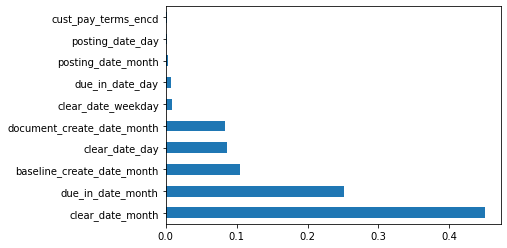

In [440]:
feat_imp = pd.Series(mod.feature_importances_,index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
tree_model3 = DecisionTreeRegressor(max_depth=18)
tree_model3.fit(X_train[['due_in_date_month','document_create_date_month','baseline_create_date_month','due_in_date_day','posting_date_month']],y_train)

In [639]:
predictedTree3 = tree_model3.predict(X_val[['due_in_date_month','document_create_date_month','baseline_create_date_month','due_in_date_day','posting_date_month']])
mean_squared_error(y_val,predictedTree3,squared=False)

43.989206086190435

### Better than univariate selection but more deviation than heatmap selection.


### Let's try for X_test dataset to see out actual error.

In [640]:
predictedTreetest = tree_model3.predict(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_test,predictedTreetest,squared=False)

21.57592564785406

In [707]:
tree_model3.score(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_test)

0.9521284767875261

### we can see above that X_test performs better than X_val in this method 

# Random Forest Model

In [668]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train[['due_in_date_day','clear_date_day','clear_date_month']],y_train)

RandomForestRegressor()

#### Checking for X_val

In [669]:
predictedTreeRFR = RFR.predict(X_val[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_val,predictedTreeRFR,squared=False)

34.85836008881614

#### checking for X_test

In [670]:
predictedTreeRFR2 = RFR.predict(X_test[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_test,predictedTreeRFR2,squared=False)

30.234608342767597

In [671]:
RFR2 = RandomForestRegressor()
RFR2.fit(X_train[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_train)

RandomForestRegressor()

In [673]:
predictedTreeRFR2 = RFR2.predict(X_val[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_val,predictedTreeRFR2,squared=False)

42.76106589708512

In [674]:
predictedTreeRFR2 = RFR2.predict(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_test,predictedTreeRFR2,squared=False)

23.24289388281166

In [697]:
RFR2.score(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_test)

0.9444455603348407

# XGB Regressor Model

In [677]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

predictedXGB = XGB.predict(X_val)
mean_squared_error(y_val,predictedXGB,squared=False)

52.51059533567802

In [678]:
predictedXGB = XGB.predict(X_test)
mean_squared_error(y_test,predictedXGB,squared=False)

32.008417838508485

### with feature selection features

In [679]:
XGB = XGBRegressor()
XGB.fit(X_train[['due_in_date_day','clear_date_day','clear_date_month']],y_train)

predictedXGB = XGB.predict(X_val[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_val,predictedXGB,squared=False)

31.813398680622722

In [680]:
predictedXGB = XGB.predict(X_test[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_test,predictedXGB,squared=False)

23.45843068007132

### With features of feature importance method

In [686]:
XGB = XGBRegressor()
XGB.fit(X_train[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_train)

predictedXGB = XGB.predict(X_val[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_val,predictedXGB,squared=False)

47.46294319157426

In [687]:
predictedXGB = XGB.predict(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_test,predictedXGB,squared=False)

20.025105440329675

In [696]:
XGB.score(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_test)

0.9587629114113463

## without clear_date column

In [700]:
XGB.fit(X_train[['due_in_date_month','document_create_date_month','baseline_create_date_month']],y_train)

predictedXGB = XGB.predict(X_val[['due_in_date_month','document_create_date_month','baseline_create_date_month']])
mean_squared_error(y_val,predictedXGB,squared=False)

150.801388584966

In [701]:
predictedXGB = XGB.predict(X_test[['due_in_date_month','document_create_date_month','baseline_create_date_month']])
mean_squared_error(y_test,predictedXGB,squared=False)

101.79617123383878

In [705]:
XGB.score(X_test[['due_in_date_month','document_create_date_month','baseline_create_date_month']],y_test)

-0.06561729356646184

### we got our least mean squared error(20.02510) by XGB regressor model

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)

predictedsvr = svr.predict(X_val)
mean_squared_error(y_val,predictedsvr,squared=False)

In [689]:
predictedsvr = svr.predict(X_test)
mean_squared_error(y_test,predictedsvr,squared=False)

122.93089469739218

### with feature selection features

In [690]:
svr.fit(X_train[['due_in_date_day','clear_date_day','clear_date_month']],y_train)

predictedsvr = svr.predict(X_val[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_val,predictedsvr,squared=False)

28.802892531667407

In [691]:
predictedsvr = svr.predict(X_test[['due_in_date_day','clear_date_day','clear_date_month']])
mean_squared_error(y_test,predictedsvr,squared=False)

42.924364880357444

### With features of feature importance method

In [692]:
svr.fit(X_train[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']],y_train)

predictedsvr = svr.predict(X_val[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_val,predictedsvr,squared=False)

23.407279491112117

In [693]:
predictedsvr = svr.predict(X_test[['due_in_date_month','clear_date_day','document_create_date_month','clear_date_month','baseline_create_date_month']])
mean_squared_error(y_test,predictedsvr,squared=False)

28.951647381896823

### without Clear Date column

In [698]:
svr.fit(X_train[['due_in_date_month','document_create_date_month','baseline_create_date_month']],y_train)

predictedsvr = svr.predict(X_val[['due_in_date_month','document_create_date_month','baseline_create_date_month']])
mean_squared_error(y_val,predictedsvr,squared=False)

126.79078072022736